In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [46]:
df = pd.read_csv('./housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<h3>Missing Values</h3>

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [48]:
mean_total_bedrooms = df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [49]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBFDFDFB48>,
      dtype=object)

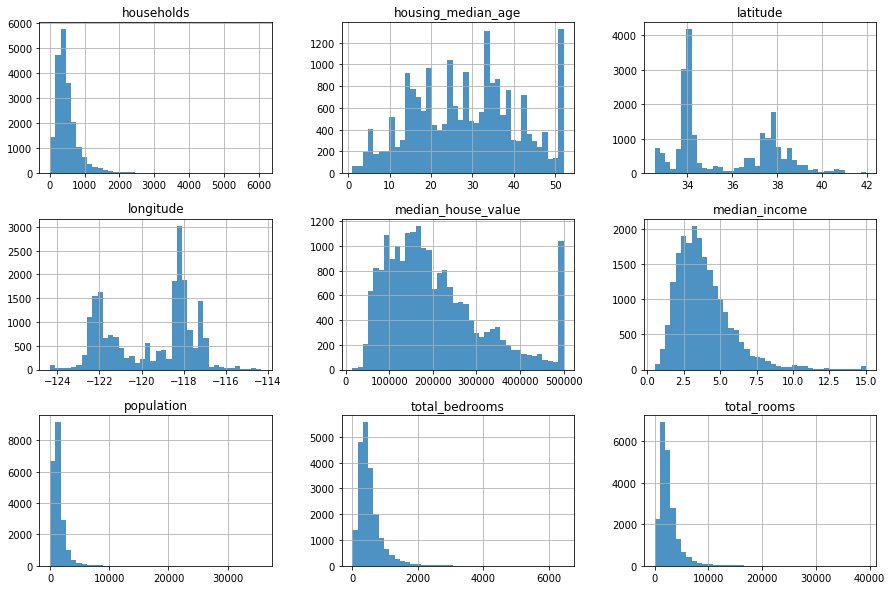

In [50]:
%matplotlib inline
df.hist(bins=40, figsize=(15,10), alpha=0.8)

<h3>Train-Test Split</h3>

In [51]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=2020)

In [52]:
housing_train = train_set.copy()

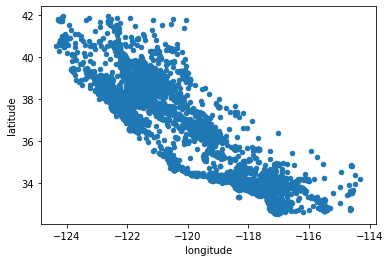

In [53]:
housing_train.plot(kind="scatter", x="longitude", y="latitude")

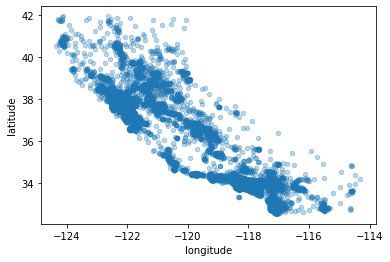

In [54]:
housing_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3)

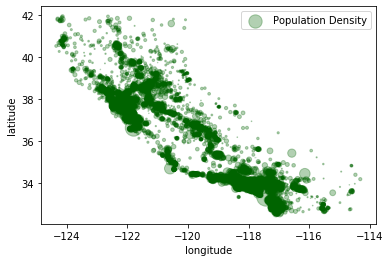

In [55]:
housing_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
                   s=housing_train["population"]/100,
                   c='DarkGreen',
                   label="Population Density")

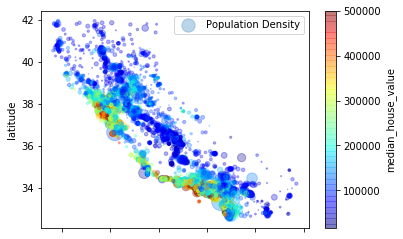

In [56]:
housing_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3, 
                   s=housing_train["population"]/100,
                   c="median_house_value",
                   cmap=plt.get_cmap("jet"),
                   colorbar=True,
                   label="Population Density")

<h3>Correlation</h3>


In [57]:
correlation_coefficients = housing_train.corr()
correlation_coefficients.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925264,-0.114226,0.046829,0.072649,0.099734,0.057902,-0.015689,-0.044995
latitude,-0.925264,1.000000,0.016845,-0.037333,-0.068833,-0.108005,-0.072578,-0.079020,-0.144330
housing_median_age,-0.114226,0.016845,1.000000,-0.362433,-0.321724,-0.297684,-0.306252,-0.118284,0.109004
total_rooms,0.046829,-0.037333,-0.362433,1.000000,0.927460,0.852466,0.917576,0.199331,0.131574
total_bedrooms,0.072649,-0.068833,-0.321724,0.927460,1.000000,0.869200,0.973588,-0.006879,0.048183


In [58]:
print(correlation_coefficients['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.686468
total_rooms           0.131574
housing_median_age    0.109004
households            0.064706
total_bedrooms        0.048183
population           -0.026499
longitude            -0.044995
latitude             -0.144330
Name: median_house_value, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB8018D648>,
      dtype=object)

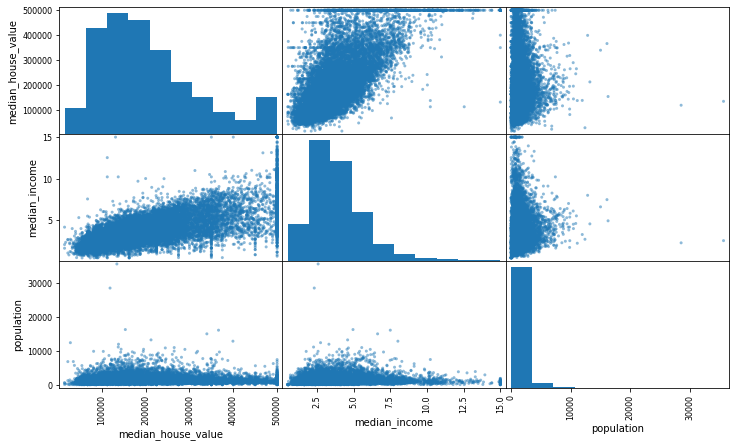

In [59]:
some_features = ['median_house_value', 'median_income', 'population']
scatter_matrix(housing_train[some_features], figsize=(12,7))

<h3>Standard Scaling and One-Hot Encoding</h3>

In [60]:
housing_numerical = housing_train.drop('ocean_proximity', axis=1)
housing_categorical = housing_train[['ocean_proximity']]

In [61]:
numerical_features = list(housing_numerical)
categorical_features = list(housing_categorical)

In [62]:
encoder = OneHotEncoder()
housing_categorical_1hot = encoder.fit_transform(housing_categorical)
housing_categorical_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [63]:
print(housing_categorical.iloc[0])
print(encoder.categories_[0])
print(housing_categorical_1hot.toarray()[0])

ocean_proximity    NEAR OCEAN
Name: 14422, dtype: object
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
[0. 0. 0. 0. 1.]


In [64]:
housing_numerical.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.569613,35.627444,28.653828,2645.445373,539.643926,1432.495216,501.002786,3.871049,206918.771863
std,2.002418,2.134950,12.565370,2191.113840,419.366363,1140.965969,381.261653,1.891836,115143.306488
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,299.000000,790.000000,281.000000,2.565200,120000.000000
50%,-118.490000,34.250000,29.000000,2127.500000,439.000000,1169.000000,410.000000,3.538950,180400.000000
75%,-118.010000,37.710000,37.000000,3150.000000,646.000000,1733.000000,606.000000,4.747575,264400.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [65]:
scaler = StandardScaler()
housing_numerical_scaled = scaler.fit_transform(housing_numerical)
housing_numerical_scaled

array([[ 1.16842958, -1.3244009 , -0.13162188, ..., -0.43017112,
        -0.74361175,  0.32552794],
       [ 1.11848844, -0.7295211 ,  0.26630922, ..., -0.23344986,
        -0.71215987, -1.02239844],
       [-1.04895737,  0.70381135, -0.76831165, ..., -0.12853186,
         0.92476511,  0.81536716],
       ...,
       [ 1.28329422, -1.35250546, -0.92748409, ...,  0.02359924,
        -1.04951432, -0.7653197 ],
       [ 0.66901811, -0.79978249,  0.26630922, ...,  0.2937631 ,
        -1.40018956, -0.86606677],
       [ 0.72395337, -0.43910733, -0.13162188, ...,  0.05769759,
        -0.04791731, -0.81135069]])

In [90]:
transform_pipeline = ColumnTransformer([
        ("numerical", StandardScaler(), numerical_features),
        ("categorical", OneHotEncoder(), categorical_features)
])

housing_transformed = transform_pipeline.fit_transform(housing_train)

In [91]:
housing_transformed.shape

(16512, 14)

<h3>Submission Part</h3>

In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


In [105]:
waterfalls = pd.read_csv('./City_Waterfalls.csv')

In [106]:
waterfalls.head()

,X,Y,OBJECTID,SNO,NAME,ALTERNATE_NAME,COMMUNITY,TYPE,RANKING,CLUSTER_AREA,HEIGHT_IN_M,WIDTH_IN_M,OWNERSHIP,ACCESS_FROM,LONGITUDE,LATITUDE
0,608456,4784015,1,88,Lewis Rd. East Falls,NaN,Stoney Creek,Cascade,C,Stoney Creek-Winona,8.0,5.0,private,McNeilly Rd.,-79.665033,43.201127
1,583986,4787936,2,27,Little Falls,NaN,Ancaster,Cascade,C,Tiffany-Coldwater,7.0,3.0,public,Wilson St. E.,-79.965579,43.239547
2,584594,4787790,3,28,Tiffany Falls,NaN,Ancaster,Waterfall,A,Tiffany-Coldwater,21.0,6.0,public,Wilson St. E. / Tiffany Falls CA,-79.958114,43.238164
3,586478,4788482,4,33,Scenic Falls,NaN,Hamilton,Cascade,A,Chedoke-Scenic,20.0,6.0,public,Scenic Dr. / Chedoke Radial Trail Head,-79.934805,43.244181
4,586872,4788682,5,34,Lower Princess Falls,Lower Lang's Falls,Hamilton,Cascade,A,Chedoke-Scenic,39.5,3.0,public,Hwy 403,-79.929921,43.245936


In [94]:
waterfalls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               75 non-null     int64  
 1   Y               75 non-null     int64  
 2   OBJECTID        75 non-null     int64  
 3   SNO             75 non-null     int64  
 4   NAME            75 non-null     object 
 5   ALTERNATE_NAME  31 non-null     object 
 6   COMMUNITY       75 non-null     object 
 7   TYPE            75 non-null     object 
 8   RANKING         75 non-null     object 
 9   CLUSTER_AREA    75 non-null     object 
 10  HEIGHT_IN_M     75 non-null     float64
 11  WIDTH_IN_M      75 non-null     float64
 12  OWNERSHIP       75 non-null     object 
 13  ACCESS_FROM     75 non-null     object 
 14  LONGITUDE       75 non-null     float64
 15  LATITUDE        75 non-null     float64
dtypes: float64(4), int64(4), object(8)
memory usage: 9.5+ KB


In [107]:
waterfalls.describe()

,X,Y,OBJECTID,SNO,HEIGHT_IN_M,WIDTH_IN_M,LONGITUDE,LATITUDE
count,75.000000,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,591837.533333,4.788215e+06,38.000000,59.560000,10.782667,4.536000,-79.868893,43.241087
std,9001.662947,4.365715e+03,21.794495,36.803437,8.118071,4.812558,0.110351,0.040041
min,580185.000000,4.782623e+06,1.000000,1.000000,3.000000,1.000000,-80.012445,43.190403
25%,584559.500000,4.784278e+06,19.500000,27.500000,5.000000,1.800000,-79.958234,43.205022
50%,588618.000000,4.787942e+06,38.000000,53.000000,8.200000,3.000000,-79.908419,43.239738
75%,598334.500000,4.790176e+06,56.500000,89.500000,15.000000,5.500000,-79.789537,43.259512
max,610668.000000,4.805550e+06,75.000000,138.000000,41.000000,30.000000,-79.637941,43.398101


In [112]:
waterfalls['COMMUNITY'].value_counts()

Hamilton        29
Stoney Creek    15
Flamborough     14
Ancaster        12
Dundas           5
Name: COMMUNITY, dtype: int64

In [113]:
waterfalls.RANKING.value_counts()

C    30
B    27
A    18
Name: RANKING, dtype: int64

In [97]:
waterfalls = waterfalls[['NAME', 'LONGITUDE', 'LATITUDE', 'HEIGHT_IN_M', 'WIDTH_IN_M', 'RANKING']]

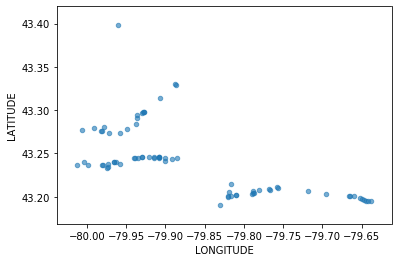

In [99]:
waterfalls.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB819D8808>,
      dtype=object)

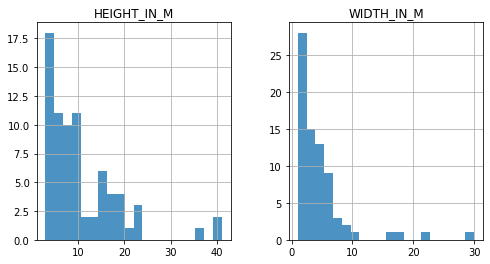

In [116]:
%matplotlib inline
waterfalls[['HEIGHT_IN_M','WIDTH_IN_M']].hist(bins=20, figsize=(8,4), alpha=0.8)